In [88]:
## Author Gautam Kumar, Senior Data Scientist, MFTBC, Tokyo.

import pandas as pd
import numpy as np
import os
from numpy import loadtxt
from xgboost import XGBClassifier
from matplotlib import pyplot

In [89]:
working_dir = "C:\\Users\\Dell 3450\\Desktop\\LnT_Documents\\Smart_Steel_Assignement\\task\\task\\"
os.chdir(working_dir)
task_df = pd.read_csv("task_data.csv")

In [90]:
list(task_df)

['sample index',
 'class_label',
 'sensor0',
 'sensor1',
 'sensor2',
 'sensor3',
 'sensor4',
 'sensor5',
 'sensor6',
 'sensor7',
 'sensor8',
 'sensor9']

Now, After reading the data sheet into data frame, first task will be to do an exploratory data analysis on it,
1.) Look for Missing data.
2.) Look at the data types for explanatory variables.
2.) Look if its a balanced data or not.
3.) Check the basic centrality and dispersion characteristics, statistics of all the columns.
4.) See the probability distributions of explanatory variables
5.) Correlation between the explanatory variables.


In [91]:
## Check the balance of both cancer type category in terms of no. of observations. This is to check if the given data is skewed towards one category.
task_df.class_label.value_counts(normalize=True).reset_index().rename(index=str,columns={'index':'class_label','class_label':'Percentage'})
    
    

,class_label,Percentage
0,-1.0,0.5
1,1.0,0.5


We See here that, both categories of the data has same number of rows. So its NOT a skewed/Unbalanced data set.

In [92]:
## Check the mission percentage
percent_missing = task_df.isnull().sum() * 100 / len(task_df)
##percent_missing_test = final_test_data_df.isnull().sum() * 100 / len(final_test_data_df)
percent_missing

sample index    0.0
class_label     0.0
sensor0         0.0
sensor1         0.0
sensor2         0.0
sensor3         0.0
sensor4         0.0
sensor5         0.0
sensor6         0.0
sensor7         0.0
sensor8         0.0
sensor9         0.0
dtype: float64

As we see above, there is no missing dara in the columns. So its really good data to work at.

In [93]:
## Look at the data types for explanatory variables.
task_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
sample index    400 non-null object
class_label     400 non-null float64
sensor0         400 non-null float64
sensor1         400 non-null float64
sensor2         400 non-null float64
sensor3         400 non-null float64
sensor4         400 non-null float64
sensor5         400 non-null float64
sensor6         400 non-null float64
sensor7         400 non-null float64
sensor8         400 non-null float64
sensor9         400 non-null float64
dtypes: float64(11), object(1)
memory usage: 37.6+ KB


In [94]:
task_df.describe()

,class_label,sensor0,sensor1,sensor2,sensor3,sensor4,sensor5,sensor6,sensor7,sensor8,sensor9
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,0.000000,0.523661,0.509223,0.481238,0.509752,0.497875,0.501065,0.490480,0.482372,0.482822,0.541933
std,1.001252,0.268194,0.276878,0.287584,0.297712,0.288208,0.287634,0.289954,0.282714,0.296180,0.272490
min,-1.000000,0.007775,0.003865,0.004473,0.001466,0.000250,0.000425,0.000173,0.003322,0.003165,0.000452
25%,-1.000000,0.299792,0.283004,0.235544,0.262697,0.249369,0.269430,0.226687,0.242848,0.213626,0.321264
50%,0.000000,0.534906,0.507583,0.460241,0.510066,0.497842,0.497108,0.477341,0.463438,0.462251,0.578389
75%,1.000000,0.751887,0.727843,0.734937,0.768975,0.743401,0.738854,0.735304,0.732483,0.740542,0.768990
max,1.000000,0.999476,0.998680,0.992963,0.995119,0.999412,0.997367,0.997141,0.998230,0.996098,0.999465


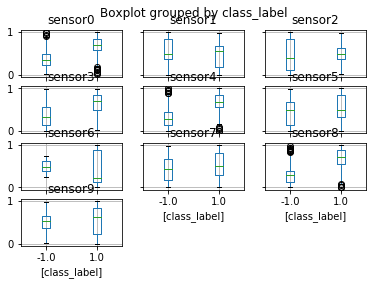

In [95]:
import matplotlib.pyplot as plt

def plotBoxPlotsByClassType(x_df,cType):
    if(cType == 'class_label'):
         x_df[['sensor0','sensor1','sensor2','sensor3','sensor4','sensor5','sensor6','sensor7','sensor8','sensor9','class_label']].boxplot(by='class_label')
        
         
#     elif(cType=='explanatory_vars'):
#          temp_df = x_df.drop(['cancer_type','diagnose_date','treatment_date'],axis=1)
#          temp_df.boxplot()
#          plt.xticks(rotation=90)

            
plotBoxPlotsByClassType(task_df,'class_label')

the box plots above show that broadly sensor0,sensor4, sensor3,sensor8 are clearly important in deciding the class label as , for these sensors values are almost disjoint (they have exclusive ranges for two values of the class label).


['sensor0', 'sensor1', 'sensor2', 'sensor3', 'sensor4', 'sensor5', 'sensor6', 'sensor7', 'sensor8', 'sensor9']


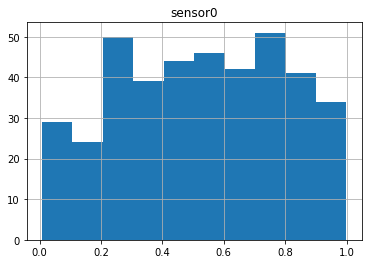

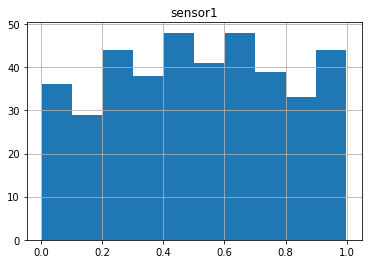

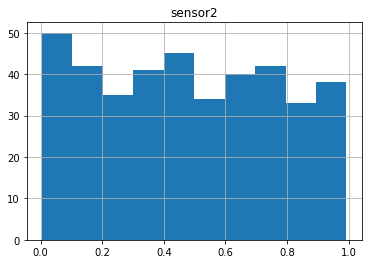

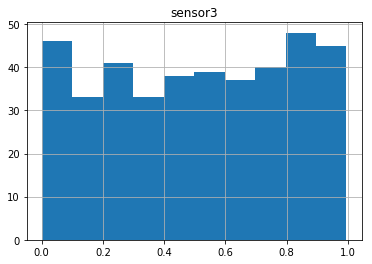

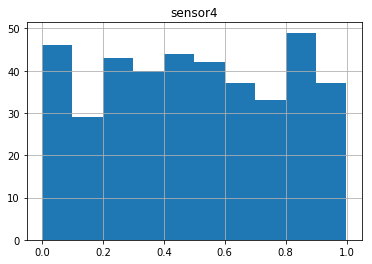

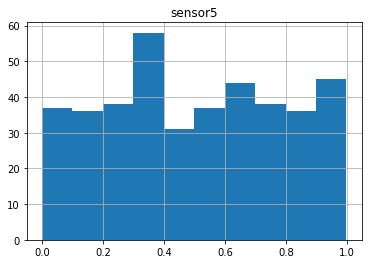

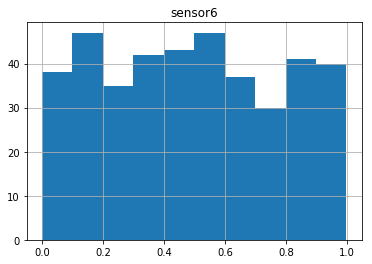

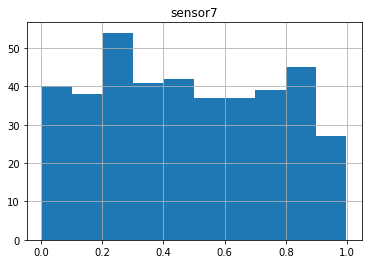

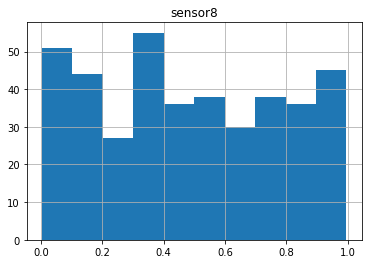

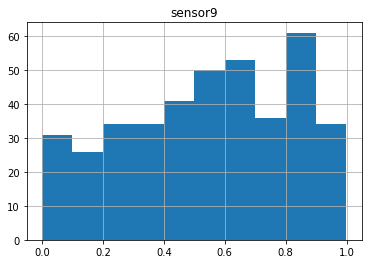

In [96]:
def plot_distributions_hist(x_df,col_list):
    for col in col_list:
        x_df[[col]].hist(bins=10)

sensor_cols = [col for col in task_df.columns if 'sensor' in col]
print(sensor_cols)
plot_distributions_hist(task_df,sensor_cols)


In [97]:

corr = task_df[sensor_cols].corr()
corr.style.background_gradient(cmap='coolwarm')


,sensor0,sensor1,sensor2,sensor3,sensor4,sensor5,sensor6,sensor7,sensor8,sensor9
sensor0,1,-0.215668,0.0195214,0.253244,0.30076,0.164243,-0.00784906,0.0803058,0.361751,0.00131657
sensor1,-0.215668,1,0.0560416,-0.111347,-0.130463,0.0554008,-0.106082,0.0315132,-0.163818,-0.023655
sensor2,0.0195214,0.0560416,1,0.0934468,-0.0234857,-0.00894763,-0.0570898,0.00689881,-0.00830811,-0.0585283
sensor3,0.253244,-0.111347,0.0934468,1,0.295136,0.0381525,-0.105005,0.00124335,0.287776,0.0137316
sensor4,0.30076,-0.130463,-0.0234857,0.295136,1,0.183916,-0.0226897,0.0901864,0.378306,0.023776
sensor5,0.164243,0.0554008,-0.00894763,0.0381525,0.183916,1,-0.0612381,0.0208142,0.220014,0.0712578
sensor6,-0.00784906,-0.106082,-0.0570898,-0.105005,-0.0226897,-0.0612381,1,0.0652107,-0.0733092,0.0407442
sensor7,0.0803058,0.0315132,0.00689881,0.00124335,0.0901864,0.0208142,0.0652107,1,0.0600281,0.0593413
sensor8,0.361751,-0.163818,-0.00830811,0.287776,0.378306,0.220014,-0.0733092,0.0600281,1,-0.0339914
sensor9,0.00131657,-0.023655,-0.0585283,0.0137316,0.023776,0.0712578,0.0407442,0.0593413,-0.0339914,1


The Heatmap shows that, the variables are not highly correlated.I am not seeing any correlation value beyond 0.36. So I will not remove any variable based on correlated  variables.

In [98]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X, y = task_df_1[sensor_cols], task_df_1.class_label

bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)

dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Variable','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features


  Variable      Score
8  sensor8  31.637080
4  sensor4  24.577241
0  sensor0  16.176762
3  sensor3  13.045426
1  sensor1   3.814755
5  sensor5   3.309987
7  sensor7   2.038891
9  sensor9   0.492408
2  sensor2   0.103099
6  sensor6   0.003760


In [99]:


# split data into X and y
X = task_df[sensor_cols]
y = task_df[['class_label']]
# fit model no training data
model = XGBClassifier()
model.fit(X, y)
# feature importance
print(model.feature_importances_)
# plot
#pyplot.bar(range(len(model.feature_importances_)), model.feature_importances_)
#pyplot.show()

[0.11814346 0.02953587 0.05485232 0.02953587 0.12236287 0.
 0.5063291  0.         0.11814346 0.02109705]


C:\Users\Dell 3450\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Dell 3450\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


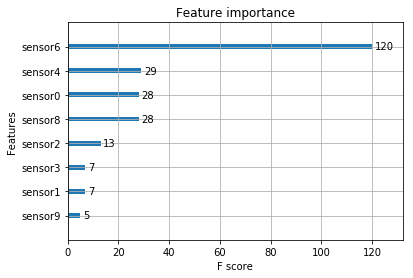

In [100]:
from xgboost import plot_importance
plot_importance(model)
pyplot.show()

The sensor readings follows approximately uniform distributions. They don't seem to follow normal distributions. I will not try any transformations of the data here as, we will be using non parametric methods to find the importance of variables.


Feature ranking:
1. feature 8 (0.312747)
2. feature 4 (0.217964)
3. feature 6 (0.201802)
4. feature 0 (0.143105)
5. feature 2 (0.047483)
6. feature 3 (0.035538)
7. feature 1 (0.019534)
8. feature 5 (0.009356)
9. feature 9 (0.007752)
10. feature 7 (0.004719)


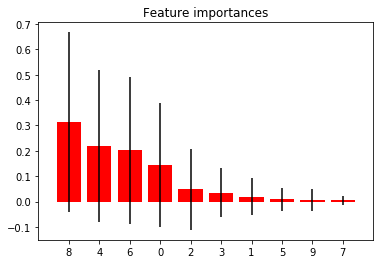

In [101]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
## this method calculates variable importance based on random forest and plots the variable importance
def calculatePlot_Variable_Importance(tr_x,tr_y):
    regr = RandomForestClassifier(max_depth=2,random_state=0,n_estimators=100)
    regr.fit(tr_x,tr_y.class_label.tolist())

    importances = regr.feature_importances_
    std = np.std([tree.feature_importances_ for tree in regr.estimators_],
             axis=0)
    indices = np.argsort(importances)[::-1]

    # Print the feature ranking
    print("Feature ranking:")

    for f in range(tr_x.shape[1]):
        print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

    # Plot the feature importances of the forest
    plt.figure()
    plt.title("Feature importances")
    plt.bar(range(tr_x.shape[1]), importances[indices],color="r", yerr=std[indices], align="center")
    plt.xticks(range(tr_x.shape[1]), indices)
    plt.xlim([-1, tr_x.shape[1]])
    plt.show()
    

    ## this method divides the input dataframe into train and test data.
def create_train_test_df(x_df,text_percentage):
    x_df = x_df.loc[:, ~x_df.columns.str.contains('^Unnamed')]
    train_X = x_df.drop(['class_label','sample index'],axis=1)
    train_Y = x_df[['class_label']]   
    X_train, X_test, y_train, y_test = train_test_split(train_X, train_Y, test_size=text_percentage, random_state=42)

    return X_train,X_test,y_train,y_test

x_train, x_test, y_train, y_test =  create_train_test_df(task_df,0.01)
## Calculate variable importance based on Variable importance statistics of random forest.
calculatePlot_Variable_Importance(x_train,y_train)


Lets look at the Correlation Matrix of the variables.

In [102]:
from sklearn.datasets import make_classification

from decomposition.var_clus import VarClus


In [103]:
demo2 = VarClus(max_eigenvalue=0.25)
demo2.decompose(task_df[sensor_cols])

decomposing cluster cluster-0
phase #1: NCS
phase #2: Search
assessing feature sensor0
current EV is 3.2299910324406094, new EV is 3.0109267883118265
assessing feature sensor3
current EV is 3.2299910324406094, new EV is 3.0378977306420607
assessing feature sensor4
current EV is 3.2299910324406094, new EV is 2.935064039030464
Number of max tries has been reached. Returning current result...
decomposing cluster cluster-0-0
phase #1: NCS
Number of features is smaller than n_split, reducing n_split temporarily
phase #2: Search
assessing feature sensor0
Number of features is smaller than n_split, reducing n_split temporarily
current EV is 2.949990958252873, new EV is 2.813950103036783
assessing feature sensor3
current EV is 2.949990958252873, new EV is 2.73991025819282
assessing feature sensor4
current EV is 2.949990958252873, new EV is 2.7951194798135557
Number of max tries has been reached. Returning current result...
decomposing cluster cluster-0-0-0
phase #1: NCS
Number of features is s

In [104]:
# Checkout the root_cluster
root_cluster = demo2.cluster

# Direct children of the root_cluster
child_clusters = root_cluster.children

# Direct parent of the root_cluster, if any
parent_clusters = root_cluster.parents

# root_cluster contains the original dataframe
root_cluster.dataframe.shape

(400, 10)

In [105]:
demo2.print_cluster_structure()

cluster-0
|
|-----cluster-0-0
|     |
|     |-----cluster-0-0-0
|     |     |
|     |     |-----cluster-0-0-0-0
|     |     |     |
|     |     |     |-----cluster-0-0-0-0-0
|     |     |     |     |-----sensor0
|     |     |     |
|     |     |     |-----cluster-0-0-0-0-1
|     |     |           |
|     |     |           |-----cluster-0-0-0-0-1-0
|     |     |           |     |-----sensor4
|     |     |           |
|     |     |           |-----cluster-0-0-0-0-1-1
|     |     |                 |-----sensor8
|     |     |
|     |     |-----cluster-0-0-0-1
|     |           |-----sensor3
|     |
|     |-----cluster-0-0-1
|           |-----sensor5
|
|-----cluster-0-1
      |
      |-----cluster-0-1-0
      |     |
      |     |-----cluster-0-1-0-0
      |     |     |
      |     |     |-----cluster-0-1-0-0-0
      |     |     |     |-----sensor1
      |     |     |
      |     |     |-----cluster-0-1-0-0-1
      |     |           |-----sensor6
      |     |
      |     |-----cluster-0-1-

The above cluster plot shows that, each sensor variable is in separate clsuter. Which means that sensor variables are not redundant and more than one variable is not represneting the same information and so, we should not think about redundant variables.

In [108]:
## Wanted to check the coefficients, of the logistic regression.


# from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import cross_val_score
# from sklearn.metrics import confusion_matrix
# def applyLogisticRegressionClassification(x_df):  
#     random_state = np.random.RandomState(0)
#     x_df1 = x_df
#     X = x_df1.drop(['class_label'],axis=1)
#     n_samples, n_features = X .shape
# #    X = X.reset_index()
    
#     y = x_df.class_label
# #    y=y.reset_index()
#     y=y.astype('int')
    
    
#     clf = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial').fit(X, y)
#     LRScore = cross_val_score(clf, X, y, cv=10)
    
#     clf.fit(X, y)
#     return clf
    
# #   print(clf.density())
# #    print("Accuracy of Logistic with 10 cross validaion score=====>>>> ",str(LRScore))
# #    print("Mean and SD of Accuracy of Logistic with 10 cross validaion score=====>>>> " + "Mean: " + str(round(np.mean(LRScore),2)) + " Standard Deviation:" +str(round(np.std(LRScore),2)))

# task_df_1 = task_df.drop(['sample index'],axis=1)

In [109]:
# lg_rg_model = applyLogisticRegressionClassification(task_df_1)
# lg_rg_model.coef_